In [1]:
#To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependency for mlxtend
import six
import sys
sys.modules['sklearn.externals.six'] = six

from mlxtend.regressor import StackingCVRegressor

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn import preprocessing

# to build machine learning models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# to evaluate the models
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

sys.modules['sklearn.externals.six'] = six

In [5]:
final_df = pd.read_csv('final_df.csv')
final_df.head()

,device_id,longitude_y,latitude_y,avg_event,clusterId,gender,age,event_id,dayofweek_num,day,hour,week,is_active,label_id,category
0,-9222956879900150000,113.24,23.19,26,0,M,36,205471,4,6,15,18,0,761,Financial Services
1,-9222956879900150000,113.24,23.19,26,0,M,36,205471,4,6,15,18,0,959,financial
2,-9222956879900150000,113.24,23.19,26,0,M,36,205471,4,6,15,18,0,761,Financial Services
3,-9222956879900150000,113.24,23.19,26,0,M,36,205471,4,6,15,18,0,777,Low liquidity
4,-9222956879900150000,113.24,23.19,26,0,M,36,205471,4,6,15,18,0,959,financial


In [6]:
final_df['gender'] = final_df['gender'].apply(lambda x:1 if x=='M' else 0)

In [7]:
final_df.head()

,device_id,longitude_y,latitude_y,avg_event,clusterId,gender,age,event_id,dayofweek_num,day,hour,week,is_active,label_id,category
0,-9222956879900150000,113.24,23.19,26,0,1,36,205471,4,6,15,18,0,761,Financial Services
1,-9222956879900150000,113.24,23.19,26,0,1,36,205471,4,6,15,18,0,959,financial
2,-9222956879900150000,113.24,23.19,26,0,1,36,205471,4,6,15,18,0,761,Financial Services
3,-9222956879900150000,113.24,23.19,26,0,1,36,205471,4,6,15,18,0,777,Low liquidity
4,-9222956879900150000,113.24,23.19,26,0,1,36,205471,4,6,15,18,0,959,financial


# Make Dependent and Target Variables

In [8]:
# Make Dependent and Target Variables
X = final_df.drop(["age","category"], axis=1)
y=  final_df['age']

# Train Test Split from final dataset

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=123, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((81231, 13), (81231,), (54155, 13), (54155,))

In [10]:
x_test.to_csv('test.csv')

In [11]:
y_train.value_counts()

29    7535
25    5162
32    4987
34    4410
30    4266
27    3654
28    3624
35    3567
26    3528
36    3223
31    2700
33    2562
43    2548
37    1959
24    1847
44    1800
39    1790
22    1779
42    1689
49    1644
23    1580
41    1501
45    1349
40    1293
38    1268
47    1083
21    1047
19     935
20     878
48     858
53     682
52     656
46     623
50     596
51     389
54     380
18     242
56     224
65     217
59     209
67     165
58      98
63      95
55      80
61      63
57      57
66      55
64      51
72      49
60      49
62      48
70      40
17      30
73      21
16      14
68      14
83      13
69       5
Name: age, dtype: int64

In [12]:
x1 = final_df.drop(["gender","category"] , axis = 1)
y1 = final_df["gender"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, test_size=0.4, random_state=123, shuffle=True)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((81231, 13), (81231,), (54155, 13), (54155,))

In [14]:
from sklearn import preprocessing

# #scaling data
scaler = preprocessing.StandardScaler()
X_train[['longitude_y','latitude_y','avg_event','clusterId']] = scaler.fit_transform(x_train[['longitude_y','latitude_y','avg_event','clusterId']])
X_test[['longitude_y','latitude_y','avg_event','clusterId']] = scaler.transform(x_test[['longitude_y','latitude_y','avg_event','clusterId']])

X_train.head()

,device_id,longitude_y,latitude_y,avg_event,clusterId,age,event_id,dayofweek_num,day,hour,week,is_active,label_id
105384,5255884550690110000,0.151818,1.578502,-0.677018,-0.052639,22,2925706,4,6,22,18,1,303
85911,2438946640360980000,0.141592,-1.415662,0.139920,0.814872,33,466119,4,6,16,18,1,777
13169,-7296688647213590000,0.542472,0.073405,0.236030,-0.509224,27,3113965,1,3,12,18,0,306
130285,9125896648976320000,0.526110,-0.168836,1.797823,-0.372249,25,67367,3,5,2,18,0,704
82446,2236270255494200000,-0.048622,1.231172,0.572416,0.312629,36,1543467,5,7,16,18,1,704


# Feature Engineering

In [15]:
from sklearn import preprocessing

# #scaling data
scaler = preprocessing.StandardScaler()
x_train[['longitude_y','latitude_y','avg_event','clusterId']] = scaler.fit_transform(x_train[['longitude_y','latitude_y','avg_event','clusterId']])
x_test[['longitude_y','latitude_y','avg_event','clusterId']] = scaler.transform(x_test[['longitude_y','latitude_y','avg_event','clusterId']])

x_train.head()

,device_id,longitude_y,latitude_y,avg_event,clusterId,gender,event_id,dayofweek_num,day,hour,week,is_active,label_id
105384,5255884550690110000,0.151818,1.578502,-0.677018,-0.052639,0,2925706,4,6,22,18,1,303
85911,2438946640360980000,0.141592,-1.415662,0.139920,0.814872,1,466119,4,6,16,18,1,777
13169,-7296688647213590000,0.542472,0.073405,0.236030,-0.509224,1,3113965,1,3,12,18,0,306
130285,9125896648976320000,0.526110,-0.168836,1.797823,-0.372249,0,67367,3,5,2,18,0,704
82446,2236270255494200000,-0.048622,1.231172,0.572416,0.312629,1,1543467,5,7,16,18,1,704


In [21]:
from sklearn import preprocessing

# #scaling data
scaler = preprocessing.StandardScaler()
X_train[['longitude_y','latitude_y','avg_event','clusterId']] = scaler.fit_transform(x_train[['longitude_y','latitude_y','avg_event','clusterId']])
X_test[['longitude_y','latitude_y','avg_event','clusterId']] = scaler.transform(x_test[['longitude_y','latitude_y','avg_event','clusterId']])

X_train.head()

,device_id,longitude_y,latitude_y,avg_event,clusterId,age,event_id,dayofweek_num,day,hour,week,is_active,label_id
105384,5255884550690110000,0.151818,1.578502,-0.677018,-0.052639,22,2925706,4,6,22,18,1,303
85911,2438946640360980000,0.141592,-1.415662,0.139920,0.814872,33,466119,4,6,16,18,1,777
13169,-7296688647213590000,0.542472,0.073405,0.236030,-0.509224,27,3113965,1,3,12,18,0,306
130285,9125896648976320000,0.526110,-0.168836,1.797823,-0.372249,25,67367,3,5,2,18,0,704
82446,2236270255494200000,-0.048622,1.231172,0.572416,0.312629,36,1543467,5,7,16,18,1,704


In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81231 entries, 105384 to 15725
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   device_id      81231 non-null  int64  
 1   longitude_y    81231 non-null  float64
 2   latitude_y     81231 non-null  float64
 3   avg_event      81231 non-null  float64
 4   clusterId      81231 non-null  float64
 5   gender         81231 non-null  int64  
 6   event_id       81231 non-null  int64  
 7   dayofweek_num  81231 non-null  int64  
 8   day            81231 non-null  int64  
 9   hour           81231 non-null  int64  
 10  week           81231 non-null  int64  
 11  is_active      81231 non-null  int64  
 12  label_id       81231 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 8.7 MB


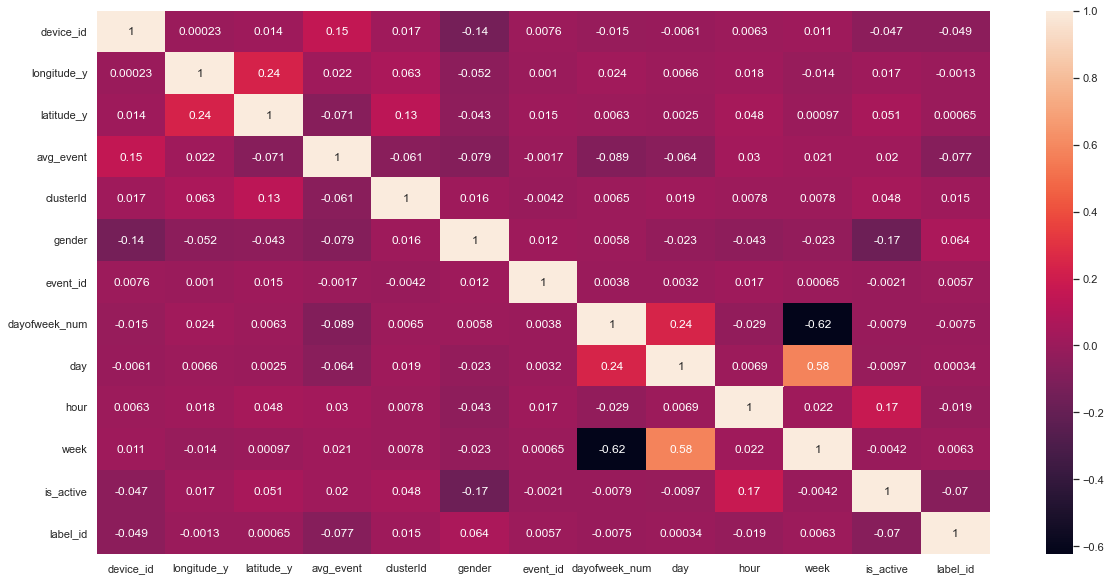

In [23]:
# Correlation with all variables
plt.figure(figsize = (20,10))
sns.heatmap(x_train.corr(),annot = True)
plt.show()

# Predefined Model Evaluation Metrices

In [26]:
def evaluate_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("R2 score : ", r2_score(y_test, y_pred))
    print("Mean squared error : ", mean_absolute_error(y_test,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5.0, random_state=1)
evaluate_model(ridge)

pred_test = ridge.predict(x_test)
test_pred_final = pd.DataFrame({'age':y_test.values, 'age_Predicted':pred_test})
test_pred_final['device_id'] = x_test.index
test_pred_final.head(20)

R2 score :  0.0381218567468915
Mean squared error :  6.697519884963824
RMSE :  8.69078843860338


,age,age_Predicted,device_id
0,44,36.343902,12500
1,29,32.273919,116727
2,32,30.963621,105612
3,29,33.674326,1764
4,31,36.573275,1301
5,33,34.054337,90723
6,24,30.086476,125306
7,47,33.563270,35740
8,34,34.238702,68132
9,37,32.655924,121969


# XGBoost Model

array([36.34390181, 32.27391936, 30.96362097, ..., 32.65218231,
       34.52163435, 32.0299791 ])

In [79]:
import xgboost as xgb


xgbr = xgb.XGBRegressor(n_estimators = 100, learning_rate =0.5, min_child_weight=3,
                               subsample=0.8, max_depth =9, colsample_bytree=0.8,
                               nthread=4, scale_pos_weight=1, seed = 10) 
evaluate_model(xgbr)

pred_test = xgbr.predict(x_test)
test_pred_final = pd.DataFrame({'age':y_test.values, 'age_Predicted':pred_test})
test_pred_final['device_id'] = x_test.index
test_pred_final.head(20)

R2 score :  0.0381218567468915
Mean squared error :  0.7856268583820221
RMSE :  1.5336664400849789


,age,age_Predicted,device_id
0,44,43.739552,12500
1,29,28.908407,116727
2,32,33.088562,105612
3,29,29.225767,1764
4,31,34.435020,1301
5,33,32.536568,90723
6,24,24.034071,125306
7,47,48.106071,35740
8,34,33.206421,68132
9,37,36.986729,121969


# Random Forest Model

In [80]:
# model built on data with high cardinality for cabin
from sklearn.ensemble import RandomForestRegressor

# call the model
rf_model = RandomForestRegressor(max_depth=30, min_samples_leaf=20, n_estimators=15, n_jobs=-1, random_state=42)

evaluate_model(rf_model)

pred_test = rf_model.predict(x_test)
test_pred_final = pd.DataFrame({'age':y_test.values, 'age_Predicted':pred_test})
test_pred_final['device_id'] = x_test.index
test_pred_final.head(20)

R2 score :  0.9700453996786778
Mean squared error :  1.1585956353053417
RMSE :  2.7397446864816666


,age,age_Predicted,device_id
0,44,44.228940,12500
1,29,28.879879,116727
2,32,32.930275,105612
3,29,29.045977,1764
4,31,31.971259,1301
5,33,33.370656,90723
6,24,24.000000,125306
7,47,46.641512,35740
8,34,34.162140,68132
9,37,37.138052,121969


In [81]:
pdist = test_pred_final['Percentage_Deviation'] = (test_pred_final['age']-test_pred_final['age_Predicted'])/test_pred_final['age']*100
pdist.head()

0   -0.520319
1    0.414211
2   -2.907110
3   -0.158541
4   -3.133094
dtype: float64

# Stacked Regressor

In [82]:
from mlxtend.regressor import StackingCVRegressor

sclf = StackingCVRegressor(regressors=[ridge, xgbr], 
                          meta_regressor=rf_model)

labels = ['Ridge', 'xgbr', 'randomforest', 'Stackingtrg']

sclf.fit(x_train.values, y_train.values)
pred_test = sclf.predict(x_test.values)
R_squared = r2_score(y_test, pred_test) 
print('R_Squared ',R_squared)
print("MSE ",mean_squared_error(y_test, pred_test))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_test)))
      
pred_test = sclf.predict(x_test.values)
test_pred_final = pd.DataFrame({'age':y_test.values, 'age_Predicted':pred_test})
test_pred_final['device_id'] = x_test.index
Percentage_Deviation = (test_pred_final['age']-test_pred_final['age_Predicted'])/test_pred_final['age']*100
test_pred_final['Percentage_Deviation'] = Percentage_Deviation
test_pred_final.head()

R_Squared  0.9694073643690935
MSE  2.4022333593951806
RMSE :  1.5499139845150054


,age,age_Predicted,device_id,Percentage_Deviation
0,44,43.881699,12500,0.268865
1,29,29.019475,116727,-0.067155
2,32,33.423964,105612,-4.449889
3,29,29.140747,1764,-0.485335
4,31,35.715155,1301,-15.210176


#### Model Evaluation

In [83]:
import pickle
pickle.dump(sclf,open("model.pickle" , "wb"))

In [84]:
model = pickle.load(open("model.pickle" , "rb"))
print(model.predict(x_test.values))

[43.88169919 29.01947495 33.42396437 ... 43.15474485 31.23422378
 49.41901964]


In [90]:
def evaluate_model_gender(model):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("R2 score : ", r2_score(Y_test, Y_pred))
    print("Mean squared error : ", mean_absolute_error(Y_test,Y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(Y_test, Y_pred)))

In [91]:
from sklearn.linear_model import Ridge

ridge1 = Ridge(alpha=5.0, random_state=1)
evaluate_model_gender(ridge1)

pred_test1 = ridge.predict(X_test)
test_pred_final1 = pd.DataFrame({'age':Y_test.values, 'age_Predicted':pred_test})
test_pred_final1['device_id'] = X_test.index
test_pred_final1.head(20)

R2 score :  0.06636390916940604
Mean squared error :  0.3808134803260728
RMSE :  0.4364146206129801


,age,age_Predicted,device_id
0,1,43.881699,12500
1,1,29.019475,116727
2,0,33.423964,105612
3,0,29.140747,1764
4,1,35.715155,1301
5,1,31.980106,90723
6,0,23.981990,125306
7,1,48.231467,35740
8,1,33.386720,68132
9,1,38.005290,121969


In [92]:
import xgboost as xgb


xgbr1 = xgb.XGBRegressor(n_estimators = 100, learning_rate =0.5, min_child_weight=3,
                               subsample=0.8, max_depth =9, colsample_bytree=0.8,
                               nthread=4, scale_pos_weight=1, seed = 10) 
evaluate_model_gender(xgbr1)

pred_test1 = xgbr.predict(X_test)
test_pred_final1 = pd.DataFrame({'age':Y_test.values, 'age_Predicted':pred_test})
test_pred_final1['device_id'] = X_test.index
test_pred_final1.head(20)

R2 score :  0.9780332566655764
Mean squared error :  0.02899108667135917
RMSE :  0.06694117232651552


,age,age_Predicted,device_id
0,1,43.881699,12500
1,1,29.019475,116727
2,0,33.423964,105612
3,0,29.140747,1764
4,1,35.715155,1301
5,1,31.980106,90723
6,0,23.981990,125306
7,1,48.231467,35740
8,1,33.386720,68132
9,1,38.005290,121969


In [93]:
from sklearn.ensemble import RandomForestRegressor

# call the model
rf_model1 = RandomForestRegressor(max_depth=30, min_samples_leaf=20, n_estimators=15, n_jobs=-1, random_state=42)

evaluate_model_gender(rf_model1)

pred_test1 = rf_model1.predict(X_test)
test_pred_final1 = pd.DataFrame({'age':Y_test.values, 'age_Predicted':pred_test})
test_pred_final1['device_id'] = X_test.index
test_pred_final1.head(20)

R2 score :  0.8923490579175041
Mean squared error :  0.06749388127202517
RMSE :  0.14819016902132107


,age,age_Predicted,device_id
0,1,43.881699,12500
1,1,29.019475,116727
2,0,33.423964,105612
3,0,29.140747,1764
4,1,35.715155,1301
5,1,31.980106,90723
6,0,23.981990,125306
7,1,48.231467,35740
8,1,33.386720,68132
9,1,38.005290,121969


In [95]:
from mlxtend.regressor import StackingCVRegressor

sclf1 = StackingCVRegressor(regressors=[ridge, xgbr], 
                          meta_regressor=rf_model)

labels1 = ['Ridge', 'xgbr', 'randomforest', 'Stackingtrg']

sclf1.fit(X_train.values, Y_train.values)
pred_test1 = sclf1.predict(X_test.values)
R_squared1 = r2_score(Y_test, pred_test) 
print('R_Squared ',R_squared)
print("MSE ",mean_squared_error(Y_test, pred_test))
print("RMSE : ", np.sqrt(mean_squared_error(Y_test, pred_test)))
      
pred_test1 = sclf.predict(X_test.values)
test_pred_final1 = pd.DataFrame({'age':Y_test.values, 'age_Predicted':pred_test})
test_pred_final1['device_id'] = X_test.index
test_pred_final1.head()

R_Squared  0.9694073643690935
MSE  1162.9323894868521
RMSE :  34.10179452003739


,age,age_Predicted,device_id
0,1,43.881699,12500
1,1,29.019475,116727
2,0,33.423964,105612
3,0,29.140747,1764
4,1,35.715155,1301


In [100]:
import pickle
pickle.dump(sclf,open("model.pickle" , "wb"))
pickle.dump(sclf1,open("model2.pickle" , "wb"))

In [16]:
model = pickle.load(open("model2.pickle" , "rb"))
print(model.predict(x_test.values))

NameError: name 'pickle' is not defined